In [11]:
from sklearn import model_selection, metrics, preprocessing, ensemble, model_selection, metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from typing import Union, List
import scipy
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, StratifiedKFold
from sklearn.metrics import classification_report

In [3]:
url_data = 'https://raw.githubusercontent.com/TeodorRusKvi/Tekstanalyse/main/git_NLP_data/'


df = pd.read_csv(url_data + 'new_df.csv')
# Last inn 'X_train_LSTM' fra en CSV-fil
X_df = pd.read_csv(url_data+'X_text.csv')
# Konverter hele DataFrame til et NumPy array
X = X_df.to_numpy()
X = X.flatten()

# Last inn 'y_train_LSTM' fra en CSV-fil
y_df = pd.read_csv(url_data+'y_liberal.csv')
# Konverter hele DataFrame til et NumPy array
y = y_df.to_numpy()

In [4]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

## Naive Bayes

In [5]:
clf = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2))),
                    #options: ngram_range=(1, 2) or min_df=10, max_df=0.5
                     ('binarizer', Binarizer()), # include this for detecting presence-absence of features
                     ('clf', MultinomialNB())
                    ])

In [6]:

# Trene modellen
clf.fit(X_train, y_train)

# Evaluere modellen
print("Validation Accuracy:", clf.score(X_val, y_val))

Validation Accuracy: 0.7712655601659751


c:\Users\bugat\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
# Evaluate the model on the test set
test_accuracy = clf.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7765681700362882


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.46      0.59       665
           1       0.77      0.94      0.85      1264

    accuracy                           0.78      1929
   macro avg       0.79      0.70      0.72      1929
weighted avg       0.78      0.78      0.76      1929

Accuracy: 0.7765681700362882
Recall: 0.9430379746835443
Precision: 0.7685364281108962
F1 Score: 0.8468916518650089


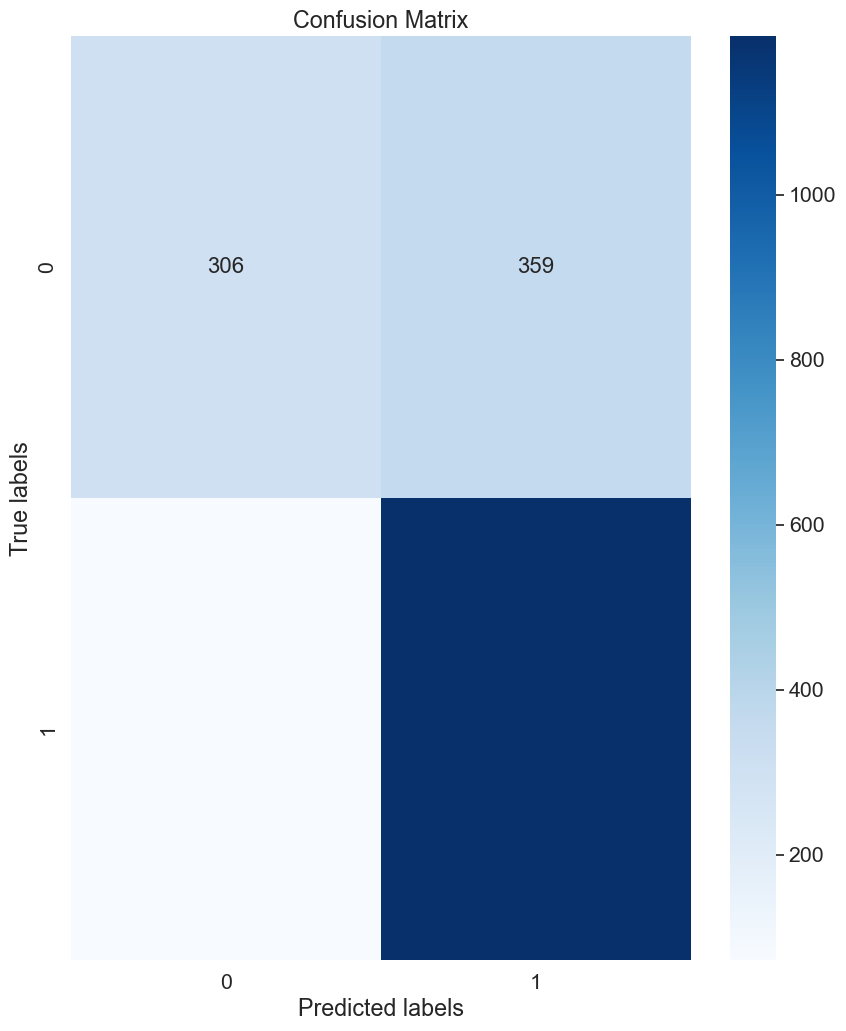

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict the responses for test dataset
y_pred = clf.predict(X_test)


# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculating different metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print each metric
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

# Creating a confusion matrix for visualization
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10,12))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues')  # fmt='g' to avoid scientific notation

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()